In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
C1_c = "#649B1C"
C2_c = "#00B593"
C3_c = "#4E84D4"

### 5 year rolling growth rate

In [47]:
ar6_data = pd.read_csv("AR6_5y_growthRate_coal.csv")
ar6_data['unit'] = ar6_data[['Model', 'Scenario']].agg('*'.join, axis=1)
ar6_data

,Region,year,Model,Scenario,Category,growth_rate,duration,start year,unit
0,R10NORTH_AM,2011,REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,C1,-0.041335,5.0,2006.0,REMIND-MAgPIE 2.1-4.2*CEMICS_SSP2-1p5C-fullCDR
1,R10NORTH_AM,2012,REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,C1,-0.041397,6.0,2006.0,REMIND-MAgPIE 2.1-4.2*CEMICS_SSP2-1p5C-fullCDR
2,R10NORTH_AM,2013,REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,C1,-0.041463,7.0,2006.0,REMIND-MAgPIE 2.1-4.2*CEMICS_SSP2-1p5C-fullCDR
3,R10NORTH_AM,2014,REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,C1,-0.041536,8.0,2006.0,REMIND-MAgPIE 2.1-4.2*CEMICS_SSP2-1p5C-fullCDR
4,R10NORTH_AM,2015,REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,C1,-0.041616,9.0,2006.0,REMIND-MAgPIE 2.1-4.2*CEMICS_SSP2-1p5C-fullCDR
...,...,...,...,...,...,...,...,...,...
43455,R10INDIA+,2046,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000_DR3p,C3,-0.117473,25.0,2021.0,MESSAGEix-GLOBIOM_1.1*EN_NPi2020_1000_DR3p
43456,R10INDIA+,2047,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000_DR3p,C3,-0.116930,26.0,2021.0,MESSAGEix-GLOBIOM_1.1*EN_NPi2020_1000_DR3p
43457,R10INDIA+,2048,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000_DR3p,C3,-0.116247,27.0,2021.0,MESSAGEix-GLOBIOM_1.1*EN_NPi2020_1000_DR3p
43458,R10INDIA+,2049,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000_DR3p,C3,-0.115365,28.0,2021.0,MESSAGEix-GLOBIOM_1.1*EN_NPi2020_1000_DR3p


In [63]:
hist_data = pd.read_csv("hist_5y_growthRate_coal.csv")
hist_data

,year,range,growth_rate,Capacity (GW),percent,duration,AR6_R10,ISO,Country Code,R_Choice
0,2006.0,2006,-0.002045,52.1416,0.976233,5.0,R10EUROPE,DEU,DEU,1
1,2007.0,2007,-0.003910,52.6316,0.976233,6.0,R10EUROPE,DEU,DEU,1
2,2008.0,2008,-0.002309,52.2106,0.976233,7.0,R10EUROPE,DEU,DEU,1
3,2009.0,2009,-0.001845,52.1206,0.976819,8.0,R10EUROPE,DEU,DEU,1
4,2010.0,2010,0.000449,51.6106,0.978427,9.0,R10EUROPE,DEU,DEU,1
...,...,...,...,...,...,...,...,...,...,...
323,2017.0,2017,-0.077892,0.7500,0.666667,5.0,R10PAC_OECD,NZL,NZL,1
324,2018.0,2018,0.000000,0.5000,0.666667,6.0,R10PAC_OECD,NZL,NZL,1
325,2019.0,2019,0.000000,0.5000,0.666667,7.0,R10PAC_OECD,NZL,NZL,1
326,2020.0,2020,0.000000,0.5000,0.666667,8.0,R10PAC_OECD,NZL,NZL,1


Text(0, 0.5, 'Growth rate')

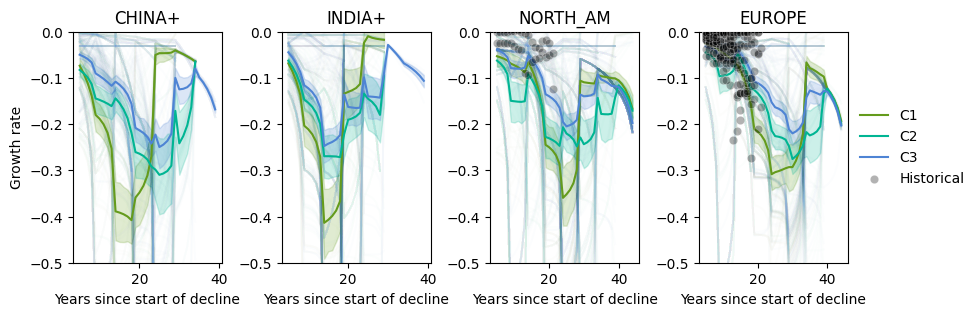

In [44]:
selected_region = [ 'R10CHINA+', 'R10INDIA+', 'R10NORTH_AM','R10EUROPE']
C_colors = [C1_c, C2_c, C3_c]
C_list = ["C1", "C2", "C3"]
fig, axes = plt.subplots(1,4,figsize=(10,3))
fig.subplots_adjust(wspace=0.4)
for reg in selected_region:
    ind = selected_region.index(reg)
    this_ax = axes[ind]
    ar6_data_reg = ar6_data.query("Region==@reg")
    sns.lineplot(x="duration", y="growth_rate",hue="Category",data=ar6_data_reg,palette=C_colors,ax=this_ax,units="unit",estimator=None,alpha=0.01,legend=None)
    sns.lineplot(x="duration", y="growth_rate",hue="Category",data=ar6_data_reg,palette=C_colors,ax=this_ax)
    sns.scatterplot(x="duration", y="growth_rate", data=hist_data.query("AR6_R10==@reg"),ax=this_ax,alpha=0.3,color="black",label="Historical",zorder=10)
    
    if ind != 0:
        this_ax.set_ylabel(None)
    this_ax.set_ylim([-0.5,0])
    this_ax.set_title(reg[3:])
    this_ax.set_xlabel("Years since start of decline")
    
    if ind !=3:
        this_ax.get_legend().remove()
    else:
        this_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
axes[0].set_ylabel("Growth rate")    

C:\Users\jx920\AppData\Local\Temp\ipykernel_10516\4173024767.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist_peak_all["peak year"] = hist_peak_all["range"]-5


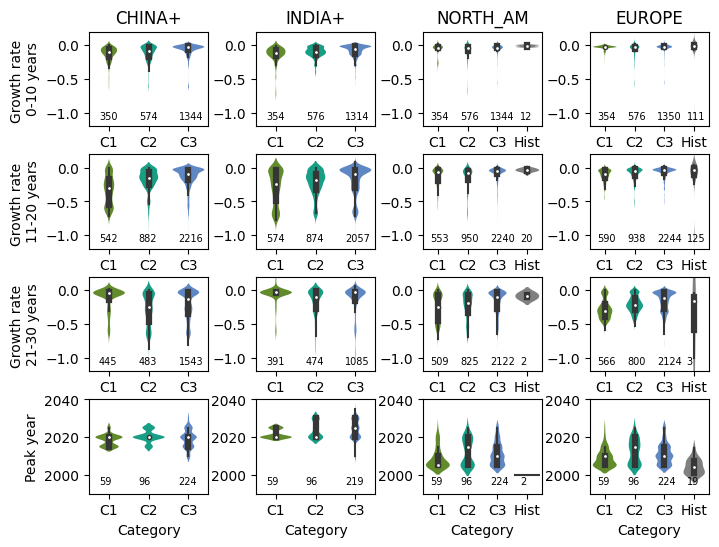

In [120]:
fig, axes = plt.subplots(4,4,figsize=(8,6))
fig.subplots_adjust(wspace=0.4,hspace=0.3)

# plot growth rate
year_list = ["0-10","11-20","21-30"]
for reg in selected_region:
    for yr_cat in year_list:
        ind_row = selected_region.index(reg)
        ind_col = year_list.index(yr_cat)
        this_ax = axes[ind_col,ind_row]
        if yr_cat == "0-10":
            hist_data_selet = hist_data[hist_data["duration"]<=10]
            ar6_data_select = ar6_data[ar6_data["duration"]<=10]
        elif yr_cat == "11-20":
            hist_data_selet = hist_data[hist_data["duration"]<=20]
            hist_data_selet = hist_data_selet[hist_data_selet["duration"]>10]
            ar6_data_select = ar6_data[ar6_data["duration"]<=20]
            ar6_data_select = ar6_data_select[ar6_data_select["duration"]>10]
        elif yr_cat == "21-30":
            hist_data_selet = hist_data[hist_data["duration"]<=30]
            hist_data_selet = hist_data_selet[hist_data_selet["duration"]>20]
            ar6_data_select = ar6_data[ar6_data["duration"]<=30]
            ar6_data_select = ar6_data_select[ar6_data_select["duration"]>20]
        ar6_data_to_plot = ar6_data_select.query("Region==@reg")[["Category","growth_rate"]]
        ar6_data_to_plot = ar6_data_to_plot.sort_values(by="Category")
        hist_dataset = hist_data_selet.query("AR6_R10==@reg")["growth_rate"].astype(float)
        hist_data_to_plot = pd.DataFrame(data={"Category":"Hist","growth_rate":hist_dataset})
        combined_to_plot = pd.concat([ar6_data_to_plot,hist_data_to_plot])
        parts = sns.violinplot(data=combined_to_plot,ax=this_ax,x="Category", y="growth_rate",palette=[C1_c,C2_c,C3_c,"gray"], linewidth=1.5)
        for collection in parts.collections:
            if isinstance(collection, matplotlib.collections.PolyCollection):
                collection.set_edgecolor('none')
        
        if ind_col == 0:
            this_ax.set_title(reg[3:])
        if ind_row == 0:
            this_ax.set_ylabel ("Growth rate \n"+yr_cat+" years")
        elif ind_row != 0:
            this_ax.set_ylabel (None)
        this_ax.set_ylim([-1.2,0.2])
        this_ax.set_xlabel(None)
        # plot observations
        obs_to_plot = combined_to_plot.groupby("Category").count()
        for obs_i in np.arange(len(obs_to_plot.index)):
            this_ax.text(obs_i-0.25,-1.1, obs_to_plot["growth_rate"].iloc[obs_i],fontsize = 7)

# plot peak year
hist_peak_all = hist_data[hist_data["duration"]==5]
hist_peak_all["peak year"] = hist_peak_all["range"]-5
for reg in selected_region:
    ind_row = selected_region.index(reg)
    this_ax = axes[3,ind_row]
    ar6_peak = ar6_data.query("Region==@reg")[["Model","Scenario","Category","start year"]].drop_duplicates()
    ar6_peak["peak year"] = ar6_peak["start year"]-1
    hist_peak = pd.DataFrame(data={"Category":"Hist","peak year":hist_peak_all.query("AR6_R10==@reg")["peak year"]})
    combined_peak = pd.concat([ar6_peak,hist_peak])
    combined_peak = combined_peak.sort_values(by="Category")
    parts = sns.violinplot(data=combined_peak,ax=this_ax,x="Category", y="peak year",palette=[C1_c,C2_c,C3_c,"gray"], linewidth=1.5)
    for collection in parts.collections:
            if isinstance(collection, matplotlib.collections.PolyCollection):
                collection.set_edgecolor('none')
    if ind_row == 0:
            this_ax.set_ylabel ("Peak year")
    else:
        this_ax.set_ylabel (None)
    this_ax.set_ylim([1990,2040])
    obs_to_plot = combined_peak.groupby("Category").count()
    for obs_i in np.arange(len(obs_to_plot.index)):
        this_ax.text(obs_i-0.25,1995, obs_to_plot["peak year"].iloc[obs_i],fontsize = 7)

### Log curve

In [48]:
ar6_data_log = pd.read_csv("AR6_log_growthRate_coal.csv")

In [145]:
hist_data_log = pd.read_csv("hist_log_growthRate_coal.csv")
hist_data_log

,ISO,L,x0,k,start_year,ratio,max_capacity,R2,TWh,rate,rate_percent,rate_Cherp,AR6_R10
0,DEU,52.18710,2025.498952,0.347052,2016.0,0.783523,52.18710,0.876840,582.28,-4.527907,-17.352591,-7.776168,R10EUROPE
1,USA,333.74401,2023.545430,0.265224,2012.0,0.635342,333.74401,0.939092,4296.88,-22.129270,-13.261224,-5.150079,R10NORTH_AM
2,BGR,6.14600,2036.413375,0.099362,2013.0,0.837781,6.14600,0.373884,50.58,-0.152670,-4.968101,-3.018382,R10EUROPE
3,CZE,8.92110,2028.316493,0.266007,2008.0,0.840659,8.92110,0.657876,85.11,-0.593269,-13.300347,-6.970610,R10EUROPE
4,ESP,13.72060,2019.493498,0.366144,2006.0,0.214677,13.72060,0.901056,270.89,-1.255929,-18.307209,-4.636308,R10EUROPE
5,ITA,9.82700,2024.247930,0.309620,2014.0,0.692582,9.82700,0.901741,278.86,-0.760659,-15.481010,-2.727747,R10EUROPE
6,GBR,34.65650,2015.857453,0.298928,2000.0,0.151025,34.65650,0.985865,336.28,-2.589953,-14.946419,-7.701775,R10EUROPE
7,CAN,18.54420,2017.045927,0.187573,2000.0,0.253815,18.54420,0.935554,644.70,-0.869599,-9.378664,-1.348843,R10NORTH_AM
8,AUS,30.51400,2029.254867,0.166574,2010.0,0.800846,30.51400,0.808910,251.68,-1.270706,-8.328676,-5.048896,R10PAC_OECD
9,FRA,8.44800,2017.371652,0.232013,2000.0,0.296757,8.44800,0.913933,556.08,-0.490011,-11.600643,-0.881188,R10EUROPE


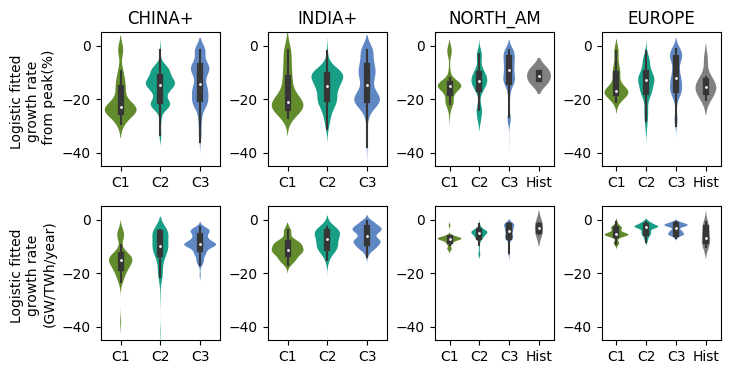

In [148]:
fig, axes = plt.subplots(2,4,figsize=(8,4))
fig.subplots_adjust(wspace=0.4,hspace=0.3)
data_type_list = ["rate_percent","rate_Cherp"]
for reg in selected_region:
    for data_type in ["rate_percent","rate_Cherp"]:
        ind_row = selected_region.index(reg)
        ind_col = data_type_list.index(data_type)
        this_ax = axes[ind_col,ind_row]
        ar6_to_plot = ar6_data_log.query("Region==@reg")[["Category",data_type]]
        hist_to_plot = pd.DataFrame(data={"Category":"Hist",
                                         data_type : hist_data_log.query("AR6_R10==@reg")[data_type]})
        combined_to_plot = pd.concat([ar6_to_plot,hist_to_plot])
        parts = sns.violinplot(data=combined_to_plot, x="Category", y=data_type,
                               palette=[C1_c,C2_c,C3_c,"gray"], linewidth=1.5,ax=this_ax)
        for collection in parts.collections:
            if isinstance(collection, matplotlib.collections.PolyCollection):
                collection.set_edgecolor('none')
        if ind_row == 0 and ind_col == 0:
                this_ax.set_ylabel ("Logistic fitted \ngrowth rate \n from peak(%)")
        elif ind_row == 0 and ind_col == 1:
                this_ax.set_ylabel ("Logistic fitted \ngrowth rate \n(GW/TWh/year)")
        else:
            this_ax.set_ylabel (None)
        this_ax.set_ylim([-45,5])
        this_ax.set_xlabel(None)
        if ind_col ==0:
            this_ax.set_title(reg[3:])